# <center> Лабораторная работа 6 "Временные ряда. Основы. Модель AR"
### <center> Воложанин Владислав Олегович ИВТ 1.3

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm
from datetime import datetime

In [2]:
df = pd.read_csv("tovar_moving.csv",  index_col=['date'], parse_dates=['date'], dayfirst=True)
df.head() 

/var/folders/g4/bf2qnm7d2wv93w55gnj671nm0000gn/T/ipykernel_82288/956378086.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv("tovar_moving.csv",  index_col=['date'], parse_dates=['date'], dayfirst=True)


,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0


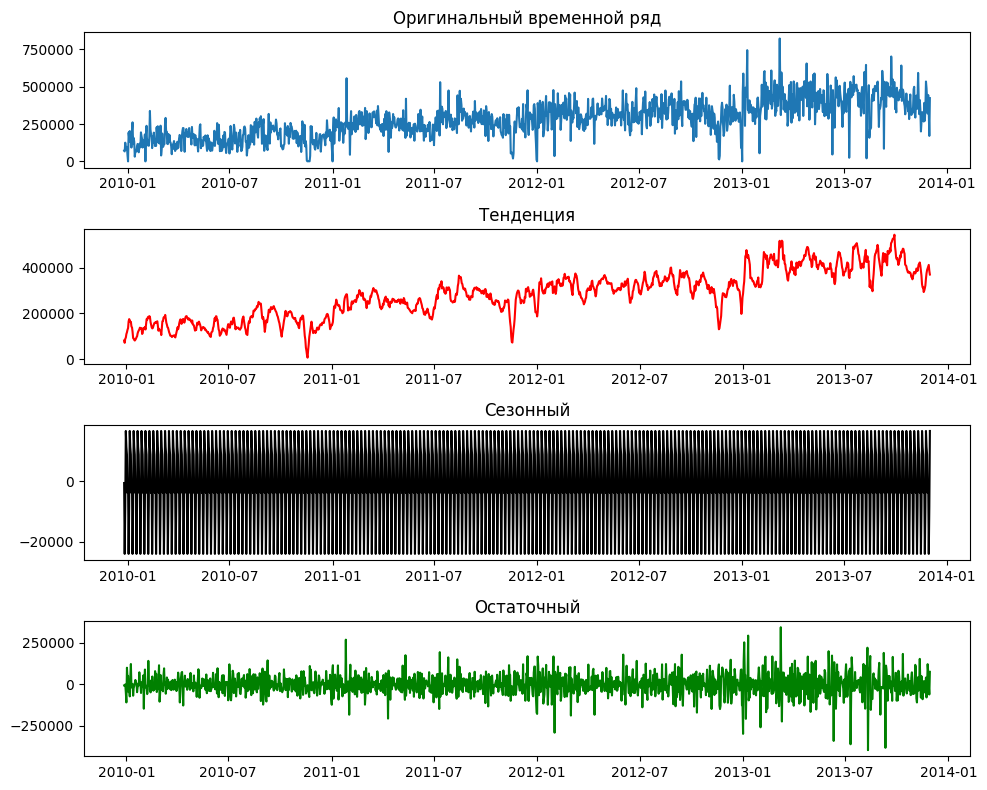

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive') 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(df)
ax1.set_title('Оригинальный временной ряд')

ax2.plot(decomposition.trend, color='red')
ax2.set_title('Тенденция')

ax3.plot(decomposition.seasonal, color='black')
ax3.set_title('Сезонный')

ax4.plot(decomposition.resid, color='green')
ax4.set_title('Остаточный')

plt.tight_layout()
plt.show()

In [4]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
print(f'Реальное значение: {round(test_df.values[0], 3)}')
print(f'Прелсказанное значение: {round(exp_pred.values[0], 3)}')

Реальное значение: 423846.0
Прелсказанное значение: 225015.523


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [5]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('Единичные корни присутствуют - ряд не стационарен')
    else:
        print ('Единичных корней нет - ряд стационарен')
stat_test(train_df)

adf:  -2.255302641033783
p-value:  0.1867890312341704
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
Единичные корни присутствуют - ряд не стационарен


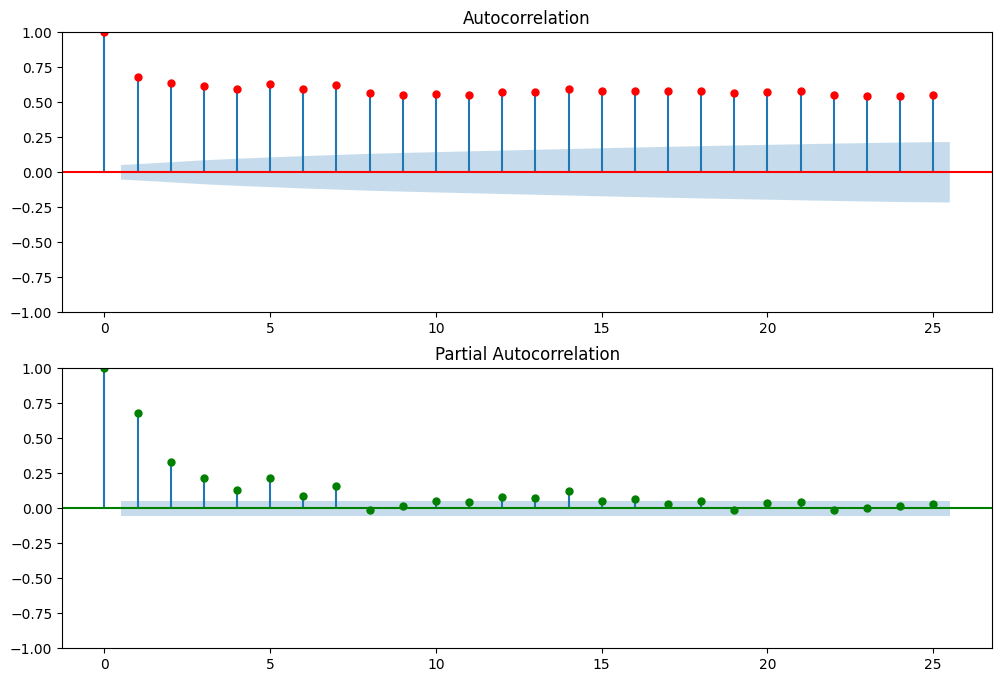

In [6]:
from matplotlib import pyplot as plt
import statsmodels.api as sm

%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1, color='red') # Указываем красный цвет
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2, color='green') # Указываем красный цвет

plt.show()

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_df, lags=2).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(2)   Log Likelihood              -18358.774
Method:               Conditional MLE   S.D. of innovations          86311.924
Date:                Wed, 29 May 2024   AIC                          36725.548
Time:                        23:18:37   BIC                          36746.627
Sample:                    12-27-2009   HQIC                         36733.418
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   6035.468     10.043      0.000    4.88e+04    7.24e+04
qty.L1         0.4568      0.025     18.317      0.000       0.408       0.506
qty.L2         0.3284      0.025     13.181      0.0

/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
print(f'Последнее значение ряда: {round(ar_pred.values[0], 5)}')

Последнее значение ряда: 244842.05395


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
